In [33]:
import numpy as np
import pandas as pd

In [34]:
df = pd.read_csv('spam.csv')

In [35]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5541,ham,Yeah it's jus rite...,NaN,NaN,NaN
4511,ham,Now project pa. After that only i can come.,NaN,NaN,NaN
5536,ham,Aiyah ok wat as long as got improve can alread...,NaN,NaN,NaN
1114,ham,No no:)this is kallis home ground.amla home to...,NaN,NaN,NaN
1207,ham,I need you to be in my strong arms...,NaN,NaN,NaN


In [36]:
df.shape

(5572, 5)

In [37]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. improvement
# 7. website
# 8. deploy

## 1. Data cleaning

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [39]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [40]:
df.sample(5)

,v1,v2
2728,spam,Urgent Please call 09066612661 from landline. ...
2394,ham,I don't run away frm u... I walk slowly &amp; ...
5386,ham,I'm at work. Please call
4740,ham,Many more happy returns of the day. I wish you...
4118,ham,Hiya do u like the hlday pics looked horrible ...


In [41]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3652,ham,It has issues right now. Ill fix for her by to...
4448,spam,Urgent UR awarded a complimentary trip to Euro...
402,ham,The hair cream has not been shipped.
4432,ham,Can u look 4 me in da lib i got stuff havent f...
2523,ham,"Sorry, I'll call later"


In [42]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [43]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [44]:
(df['Target'])=encoder.fit_transform(df['target'])

In [45]:
df.head()

,target,text,Target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [46]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [47]:
df.duplicated().sum()

0

In [48]:
df.shape

(5169, 3)

## 2. EDA

In [49]:
df.head()

,target,text,Target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [50]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x21596a95eb0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

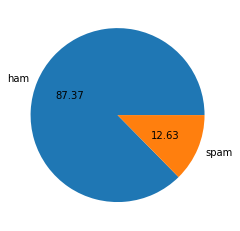

In [51]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

In [52]:
# data is imbalanced

In [53]:
import nltk

In [54]:
!pip install nltk

In [ ]:
nltk.download('punkt')

In [ ]:
df['num_characters']=df['Text'].apply(len)

In [ ]:
df.head()

In [ ]:
# num of words
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

In [ ]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

In [ ]:
#ham msg
df[df['Target']== 0][['num_characters','num_words','num_sentences']].describe()

In [ ]:
#spam msgs
df[df['Target']== 1][['num_characters','num_words','num_sentences']].describe()

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']== 0]['num_characters'])
sns.histplot(df[df['Target']== 1]['num_characters'],color='red')


In [ ]:
 plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']== 0]['num_words'])
sns.histplot(df[df['Target']== 1]['num_words'],color='red')


In [ ]:
sns.pairplot(df,hue='Target')

In [ ]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preproccesing
lower case

tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [ ]:
def transform_Text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
  
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
        
    Text = y[:]
    y.clear() 
   
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
             y.append(i)
                
    Text = y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
        
               
    return" ".join(y)

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
import string
string.punctuation

In [ ]:
transform_Text("I am gonna be home soon and i dont want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [ ]:
df['Text'][10]

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

In [ ]:
df['transform_Text'] = df['Text'].apply(transform_Text)

In [ ]:
df.head()

In [ ]:
import sys
print(sys.executable )

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['Target']==1]['transform_Text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['Target']==0]['transform_Text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

In [ ]:
spam_corpus = []
for msg in df[df['Target'] ==1 ]['transform_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['Target'] ==0 ]['transform_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transform_Text']).toarray()


In [ ]:
X.shape

In [ ]:
y= df['Target'].values

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
# tfidf--> MNB

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))